In [1]:
print("Hello")

Hello


In [1]:
! unzip ~/Data-20220122T185125Z-001.zip -d ~/

Archive:  /Users/nivedhakumar/Data-20220122T185125Z-001.zip
   creating: /Users/nivedhakumar/Data/five_dollar_bills/
   creating: /Users/nivedhakumar/Data/twenty_dollar_bills/
   creating: /Users/nivedhakumar/Data/fifty_dollar_bills/
   creating: /Users/nivedhakumar/Data/ten_dollar_bills/
   creating: /Users/nivedhakumar/Data/hundred_dollar_bills/
  inflating: /Users/nivedhakumar/Data/one_dollar_bills/one_dollar_bill_396.png  
  inflating: /Users/nivedhakumar/Data/one_dollar_bills/one_dollar_bill_392.png  
  inflating: /Users/nivedhakumar/Data/one_dollar_bills/one_dollar_bill_380.png  
  inflating: /Users/nivedhakumar/Data/one_dollar_bills/one_dollar_bill_390.png  
  inflating: /Users/nivedhakumar/Data/one_dollar_bills/one_dollar_bill_393.png  
  inflating: /Users/nivedhakumar/Data/one_dollar_bills/one_dollar_bill_398.png  
  inflating: /Users/nivedhakumar/Data/one_dollar_bills/one_dollar_bill_391.png  
  inflating: /Users/nivedhakumar/Data/one_dollar_bills/one_dollar_bill_387.png  
  

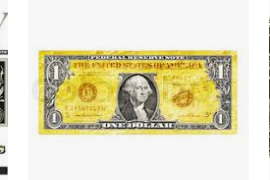

In [5]:
from IPython import display
display.Image("./Data/one_dollar_bills/one_dollar_bill_387.png")

#from IPython.display import Image
#Image("/Data/one_dollar_bills/one_dollar_bill_387.png")

In [7]:
!pip install pandas

     |████████████████████████████████| 11.5 MB 3.0 MB/s            
     |████████████████████████████████| 503 kB 3.3 MB/s            
     |████████████████████████████████| 17.7 MB 3.2 MB/s            


In [10]:
# Requires the latest pip
!pip install --upgrade pip

# Current stable release for CPU and GPU
!pip install tensorflow

# Or try the preview build (unstable)
!pip install tf-nightly

     |████████████████████████████████| 212.0 MB 3.6 MB/s            
     |████████████████████████████████| 57 kB 3.0 MB/s            
     |████████████████████████████████| 1.6 MB 574 kB/s            
     |████████████████████████████████| 1.0 MB 3.3 MB/s            
     |████████████████████████████████| 12.2 MB 3.0 MB/s            
     |████████████████████████████████| 126 kB 3.3 MB/s            
     |████████████████████████████████| 462 kB 741 kB/s            
     |████████████████████████████████| 65 kB 3.4 MB/s            
  Preparing metadata (setup.py) ... done
     |████████████████████████████████| 42 kB 2.0 MB/s            
     |████████████████████████████████| 4.0 MB 3.2 MB/s            
     |████████████████████████████████| 3.1 MB 3.3 MB/s            
     |████████████████████████████████| 5.8 MB 3.8 MB/s            
     |████████████████████████████████| 1.4 MB 3.3 MB/s            
     |████████████████████████████████| 3.5 MB 3.5 MB/s            
     |█

In [2]:
import pandas as pd
import numpy as np
import os
import tensorflow as tf
import cv2
from tensorflow import keras
from tensorflow.keras import layers, Dense, Input, InputLayer, Flatten
from tensorflow.keras.models import Sequential, Model
from  matplotlib import pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

ModuleNotFoundError: No module named 'tensorflow'

In [17]:
IMG_WIDTH=200
IMG_HEIGHT=200
data_folder=r'./Data/'

In [1]:
def create_dataset(data_folder):
   
    img_data_array=[]
    class_name=[]
    #loops through each folder, each representing a different dollar bill type
    for dir1 in os.listdir(data_folder):
        #loops through each image in the folder
        print(dir1)
        for file in os.listdir(os.path.join(data_folder, dir1)):
       
            image_path= os.path.join(data_folder, dir1,  file)
            image= cv2.imread( image_path, cv2.COLOR_BGR2RGB)
            image=cv2.resize(image, (IMG_HEIGHT, IMG_WIDTH),interpolation = cv2.INTER_AREA)
            image=np.array(image)
            image = image.astype('float32')
            image /= 255 
            img_data_array.append(image)
            class_name.append(dir1)
    return img_data_array, class_name
# extract the image array and class name
img_data, class_name = create_dataset(r'./Data/')

NameError: name 'os' is not defined

In [26]:
target_dict={k: v for v, k in enumerate(np.unique(class_name))}
target_dict

{'one_dollar_bills': 0}

In [ ]:
model=tf.keras.Sequential(
        [
            tf.keras.layers.InputLayer(input_shape=(IMG_HEIGHT,IMG_WIDTH, 3)),
            tf.keras.layers.Conv2D(filters=32, kernel_size=3, strides=(2, 2), activation='relu'),
            tf.keras.layers.Conv2D(filters=64, kernel_size=3, strides=(2, 2), activation='relu'),
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(6)
        ])
encoder.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(x=np.array(img_data, np.float32), y=np.array(list(map(int,target_val)), np.float32), epochs=5)

In [ ]:
# need to split the orginal folder into testing and training data sets and then evaluate
test_loss, test_acc = model.evaluate(test_images, test_labels)
print("Test accuracy:", test_acc)

In [3]:
conda list

# packages in environment at /Users/nivedhakumar/opt/anaconda3:
#
# Name                    Version                   Build  Channel
_ipyw_jlab_nb_ext_conf    0.1.0            py39hecd8cb5_0  
alabaster                 0.7.12             pyhd3eb1b0_0  
anaconda                  2021.11                  py39_0  
anaconda-client           1.9.0            py39hecd8cb5_0  
anaconda-navigator        2.1.1                    py39_0  
anaconda-project          0.10.1             pyhd3eb1b0_0  
anyio                     2.2.0            py39hecd8cb5_1  
appdirs                   1.4.4              pyhd3eb1b0_0  
applaunchservices         0.2.1              pyhd3eb1b0_0  
appnope                   0.1.2           py39hecd8cb5_1001  
appscript                 1.1.2            py39h9ed2024_0  
argh                      0.26.2           py39hecd8cb5_0  
argon2-cffi               20.1.0           py39h9ed2024_1  
arrow                     0.13.1           py39hecd8cb5_0  
asn1crypto               